In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("user_bus_review_df_SB.csv")
data

,business_id,name_x,address,city,state,postal_code,latitude,longitude,stars_x,review_count_x,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,yPSejq3_erxo9zdVYTBnZA,Los Agaves,600 N Milpas St,Santa Barbara,CA,93101,34.427494,-119.686624,4.5,3834,...,23,28,2,3,214,269,427,427,190,37
1,U3grYFIeu6RgAAQgdriHww,Brophy Bros - Santa Barbara,119 Harbor Way,Santa Barbara,CA,93109,34.403759,-119.693992,4.0,2940,...,64,49,49,10,427,1064,1506,1506,504,488
2,edJoBsse6nsF0BYh6pATAg,The Palace Grill,8 E Cota St,Santa Barbara,CA,93101,34.417996,-119.696310,4.5,1500,...,0,0,1,0,10,3,3,3,4,0
3,U2hkeMI-q4cS35QolJYN0A,Arigato Sushi,1225 State St,Santa Barbara,CA,93101,34.423850,-119.705477,4.0,980,...,2,2,0,0,14,5,4,4,1,1
4,yPSejq3_erxo9zdVYTBnZA,Los Agaves,600 N Milpas St,Santa Barbara,CA,93101,34.427494,-119.686624,4.5,3834,...,0,0,0,0,5,1,6,6,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162278,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,0,0,0,0,0,1,0,0,0,0
162279,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,0,0,0,0,0,0,1,1,0,0
162280,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,0,0,0,0,1,0,0,0,0,0
162281,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,4.0,299,...,0,0,0,0,0,0,0,0,0,0


In [2]:
data.columns

Index(['business_id', 'name_x', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars_x', 'review_count_x', 'is_open',
       'attributes', 'categories', 'hours', 'review_id', 'user_id', 'stars_y',
       'useful_x', 'funny_x', 'cool_x', 'text', 'date', 'name_y',
       'review_count_y', 'yelping_since', 'useful_y', 'funny_y', 'cool_y',
       'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'reviews' and 'business' are pandas DataFrames already loaded

# Filter reviews with 5 stars and count them per business_id
most5StarsReviews = data[data['stars_y'] == 5].groupby('name_x').size().reset_index(name='Count')
most5StarsReviews = most5StarsReviews.sort_values(by='Count', ascending=False).head(10)
most5StarsReviews

,name_x,Count
335,Los Agaves,3214
377,Mesa Verde,1523
85,Brophy Bros - Santa Barbara,1355
70,Boathouse at Hendry's Beach,1274
523,Santa Barbara Shellfish Company,1022
345,Lure Fish House,980
75,Bouchon,971
456,Pickles & Swiss,939
624,The Lark,891
309,La Super-Rica Taqueria,869


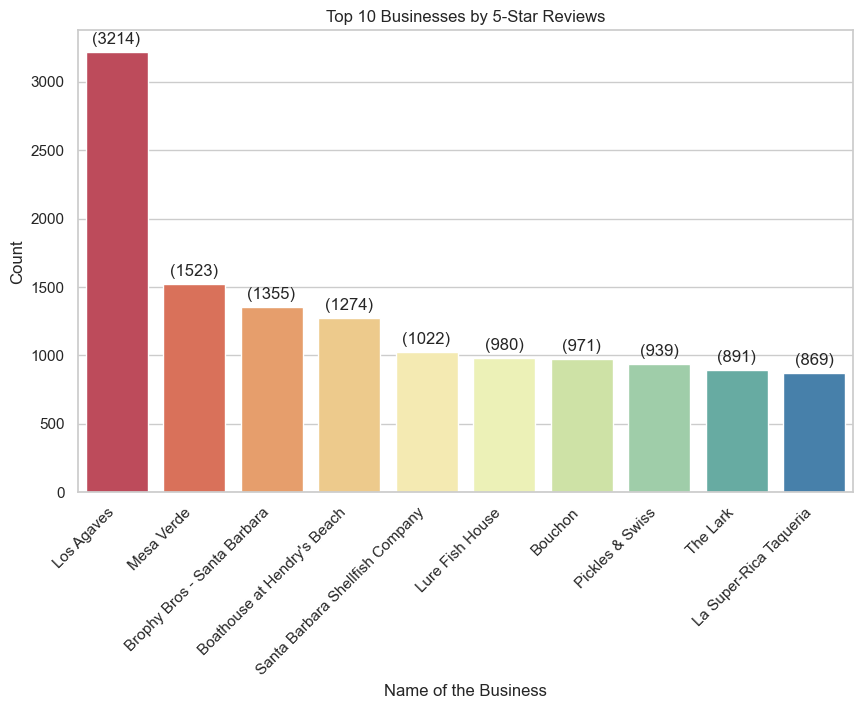

In [7]:
# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='name_x', y='Count', data=most5StarsReviews, palette='Spectral', edgecolor="white")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
barplot.set(xlabel='Name of the Business', ylabel='Count', title='Top 10 Businesses by 5-Star Reviews')

# Add count labels to bars
for p in barplot.patches:
    barplot.annotate(f'({int(p.get_height())})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()

[nltk_data] Downloading package punkt to /Users/liusq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/liusq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


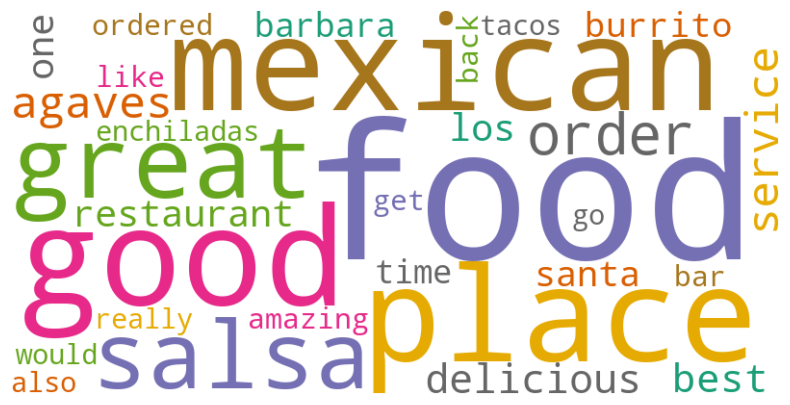

In [9]:
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Make sure to download stopwords from NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def create_word_cloud(train):
    # Tokenize and remove stopwords
    words = []
    for text in train['text']:
        words.extend(word_tokenize(text.lower()))  # Convert text to lowercase and tokenize

    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove non-alphabetic words and stopwords
    
    # Count words and keep the top 30
    word_counts = Counter(filtered_words)
    most_common_words = word_counts.most_common(30)

    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=30, colormap='Dark2').generate_from_frequencies(dict(most_common_words))
    
    # Display the generated word cloud:
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Turn off axis grid
    plt.show()

# Filter reviews for a specific business_id
filtered_reviews = data[data['name_x'] == "Los Agaves"]
create_word_cloud(filtered_reviews)

[nltk_data] Downloading package punkt to /Users/liusq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/liusq/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


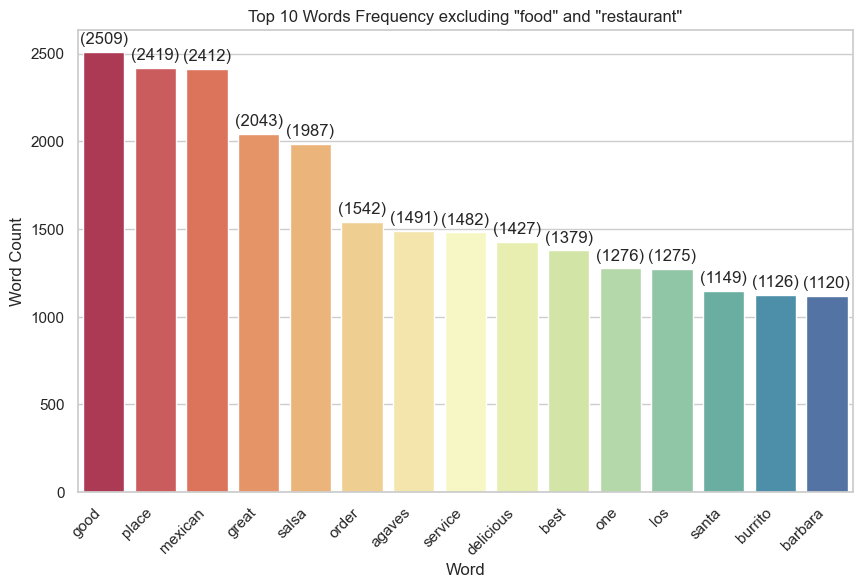

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Make sure to download stopwords from NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Assuming 'reviews' is a pandas DataFrame already loaded

# Filter reviews for a specific business_id
filtered_reviews = data[data['name_x'] == "Los Agaves"]

# Define additional stopwords
additional_stopwords = {'food', 'restaurant'}

# Process text and count words
word_counts = {}
stop_words = set(stopwords.words('english')).union(additional_stopwords)

for review in filtered_reviews['text']:
    words = word_tokenize(review.lower())  # Convert to lower case and tokenize
    for word in words:
        if word.isalpha() and word not in stop_words:  # Check if word is alphabetic and not a stop word
            if word not in word_counts:
                word_counts[word] = 1
            else:
                word_counts[word] += 1

# Convert word counts to DataFrame
words_df = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
words_df = words_df.sort_values(by='count', ascending=False).head(15)  # Sort and select top 10

# Plotting
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='word', y='count', data=words_df, palette='Spectral', edgecolor="white")
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, horizontalalignment='right')
barplot.set(xlabel='Word', ylabel='Word Count', title='Top 10 Words Frequency excluding "food" and "restaurant"')

# Add count labels to bars
for p in barplot.patches:
    barplot.annotate(f'({int(p.get_height())})', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='center', 
                     xytext=(0, 9), 
                     textcoords='offset points')

plt.show()


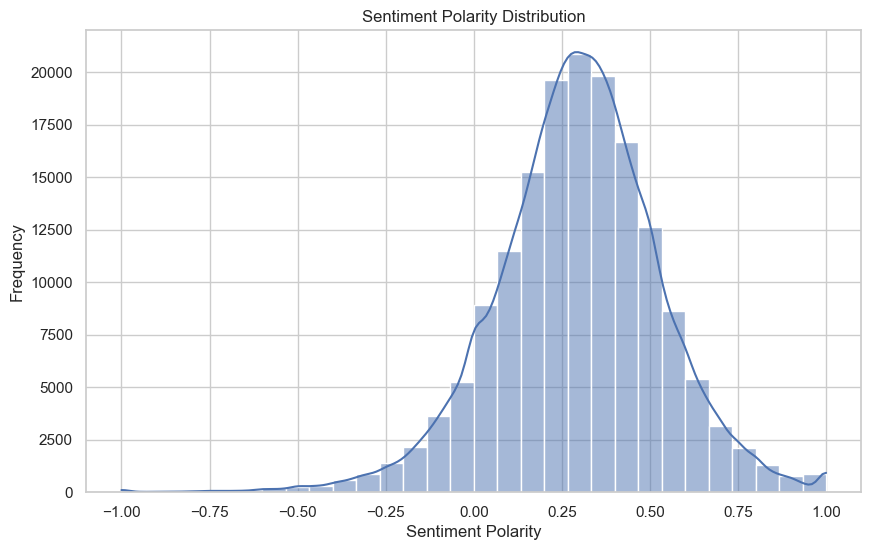

In [20]:
from textblob import TextBlob

data.loc[:, 'sentiment'] = data['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

plt.figure(figsize=(10, 6))
sns.histplot(data['sentiment'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

[nltk_data] Downloading package punkt to /Users/liusq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


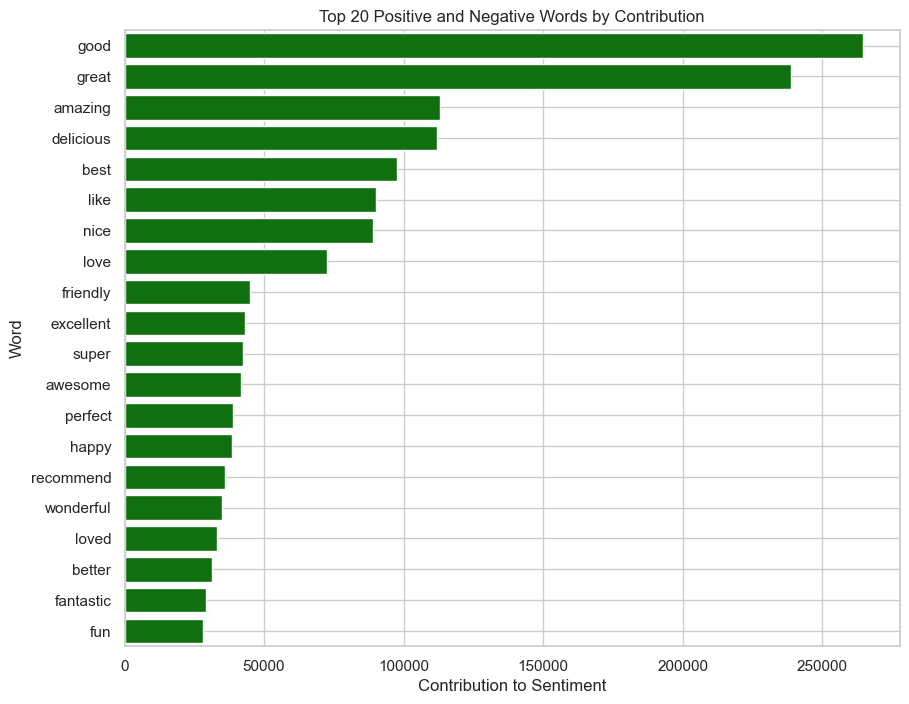

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from afinn import Afinn
import nltk

# Make sure to download stopwords from NLTK
nltk.download('punkt')

# Define the function
def positive_words_bar_graph(SC):
    # Initialize Afinn sentiment analyzer
    afinn = Afinn()

    # Tokenize and calculate sentiment scores
    words_list = []
    for text in SC['text']:
        words = word_tokenize(text.lower())  # Tokenize and convert to lower case
        for word in words:
            if word.isalpha():  # Check if the word is alphabetic
                words_list.append(word)

    # Create DataFrame from the list of words
    words_df = pd.DataFrame(words_list, columns=['word'])
    
    # Count occurrences of each word
    word_counts = words_df['word'].value_counts().reset_index()
    word_counts.columns = ['word', 'occurrences']

    # Add sentiment scores
    word_counts['score'] = word_counts['word'].apply(lambda x: afinn.score(x))
    word_counts['contribution'] = word_counts['occurrences'] * word_counts['score']

    # Filter top 20 positive/negative words by contribution
    top_contributions = word_counts.loc[word_counts['score'] != 0].nlargest(20, 'contribution', 'all')

    # Plotting
    plt.figure(figsize=(10, 8))
    barplot = sns.barplot(x='contribution', y='word', data=top_contributions, palette=top_contributions['contribution'].apply(lambda x: 'green' if x > 0 else 'red'))
    plt.xlabel('Contribution to Sentiment')
    plt.ylabel('Word')
    plt.title('Top 20 Positive and Negative Words by Contribution')
    plt.grid(True)
    plt.show()

# Filter reviews for a specific business_id and apply the function
# filtered_reviews = reviews[reviews['business_id'] == "4JNXUYY8wbaaDmk3BPzlWw"]
positive_words_bar_graph(data)